# Business Question:
What factors contribute most to the overall rating of a cereal product, and how can we optimize these factors to improve the product's market performance?

In [ ]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_Cereals = pd.read_csv("/content/drive/MyDrive/Spring_2024/Business_ML/Code/Cereals.csv")
print(f"Number of records: {df_Cereals.shape[0]:,}\nNumber of columns: {df_Cereals.shape[1]:,}")

Number of records: 77
Number of columns: 16


In [ ]:
df_Cereals.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [ ]:
df_Cereals.describe

<bound method NDFrame.describe of                          name mfr type  calories  protein  fat  sodium  fiber  \
0                   100%_Bran   N    C        70        4    1     130   10.0   
1           100%_Natural_Bran   Q    C       120        3    5      15    2.0   
2                    All-Bran   K    C        70        4    1     260    9.0   
3   All-Bran_with_Extra_Fiber   K    C        50        4    0     140   14.0   
4              Almond_Delight   R    C       110        2    2     200    1.0   
..                        ...  ..  ...       ...      ...  ...     ...    ...   
72                    Triples   G    C       110        2    1     250    0.0   
73                       Trix   G    C       110        1    1     140    0.0   
74                 Wheat_Chex   R    C       100        3    1     230    3.0   
75                   Wheaties   G    C       100        3    1     200    3.0   
76        Wheaties_Honey_Gold   G    C       110        2    1     200    1

## Heat Map: Handling Missing Values

<Axes: >

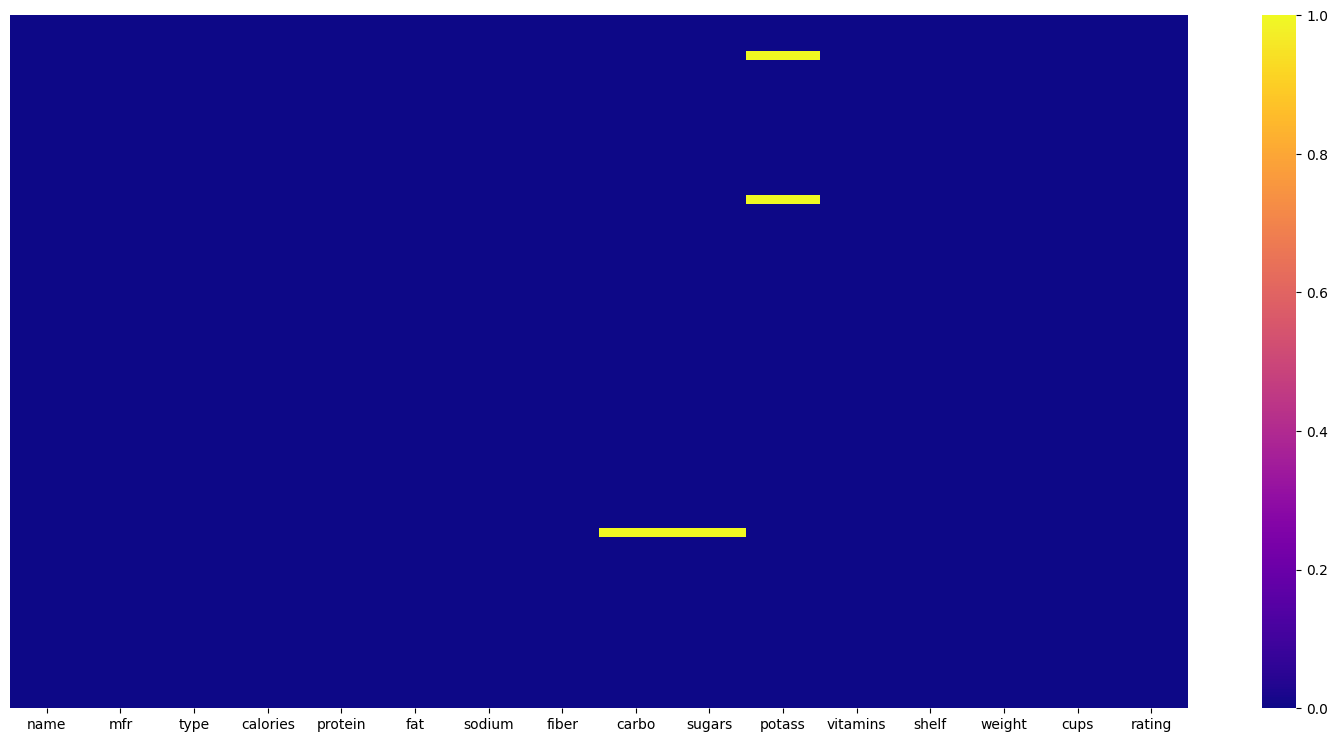

In [ ]:
import seaborn as sns
# visualizing missing values
fig, ax = plt.subplots(figsize=(19,9))
sns.heatmap(df_Cereals.isnull(), yticklabels=False,cmap='plasma')

In [ ]:
# Count missing values per column
missing_values = df_Cereals.isnull().sum()

# Calculate percentage of missing values per column
percentage_missing = (missing_values / len(df_Cereals)) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

# Display the summary
print(missing_data_summary)

          Missing Values  Percentage Missing
name                   0            0.000000
mfr                    0            0.000000
type                   0            0.000000
calories               0            0.000000
protein                0            0.000000
fat                    0            0.000000
sodium                 0            0.000000
fiber                  0            0.000000
carbo                  1            1.298701
sugars                 1            1.298701
potass                 2            2.597403
vitamins               0            0.000000
shelf                  0            0.000000
weight                 0            0.000000
cups                   0            0.000000
rating                 0            0.000000


In [ ]:
# Drop rows with any missing values
df_Cereals = df_Cereals.dropna()

# Display the info of the cleaned DataFrame
df_Cereals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      74 non-null     object 
 1   mfr       74 non-null     object 
 2   type      74 non-null     object 
 3   calories  74 non-null     int64  
 4   protein   74 non-null     int64  
 5   fat       74 non-null     int64  
 6   sodium    74 non-null     int64  
 7   fiber     74 non-null     float64
 8   carbo     74 non-null     float64
 9   sugars    74 non-null     float64
 10  potass    74 non-null     float64
 11  vitamins  74 non-null     int64  
 12  shelf     74 non-null     int64  
 13  weight    74 non-null     float64
 14  cups      74 non-null     float64
 15  rating    74 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


Since none of the columns are missing an extensive amoung of data, I will not drop any of the columns.

## Correlation Matrix

In [ ]:
import plotly.express as px
# Calculate the correlation matrix
correlation_matrix = df_Cereals.corr()

# Create a heatmap to visualize the correlation matrix
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='viridis')

fig.update_layout(
    title='Correlation of Variables',
    width=1000,
    height=800,
    font=dict(size=10),  # Adjust font size for better visibility
    margin=dict(l=40, r=40, t=80, b=40),  # Set margins for better layout
)

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        fig.add_annotation(x=correlation_matrix.columns[i],
                           y=correlation_matrix.columns[j],
                           text=str(round(correlation_matrix.iloc[i, j], 2)),
                           showarrow=False,
                           font=dict(color='black', size=8))

fig.show()

<ipython-input-33-168db2a399f4>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



#### Scaling Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_training = df_Cereals.copy()

# Extract numeric columns
numeric_columns = df_training.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_training[numeric_columns]

# Normalizing a DataFrame using pandas:
norm_df_pandas = (df_numeric - df_numeric.mean()) / df_numeric.std()

# Normalizing a DataFrame using scikit-learn StandardScaler:
scaler_standard = StandardScaler()
norm_df_scikit_standard = pd.DataFrame(scaler_standard.fit_transform(df_numeric),
                                       index=df_numeric.index, columns=df_numeric.columns)

# Rescaling a DataFrame using pandas:
rescaled_df_pandas = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())

# Rescaling a DataFrame using scikit-learn MinMaxScaler:
scaler_minmax = MinMaxScaler()
rescaled_df_scikit_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_numeric),
                                         index=df_numeric.index, columns=df_numeric.columns)




####Training/Testing

In [ ]:
from sklearn.model_selection import train_test_split

# 'rating' is the target variable
X = df_numeric.drop('rating', axis=1)  # Features
y = df_numeric['rating']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (59, 12)
X_test shape: (15, 12)
y_train shape: (59,)
y_test shape: (15,)


#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_numeric.drop('rating', axis=1)  # Features
y = df_numeric['rating']  # Target variable

# Split the data into training and test sets
# it's an 80/20 split

# random_state parameter ensures reproducibility:
# meaning if you run the code multiple times, you'll get the same split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = LinearRegression() # Create a linear regression model
model.fit(X_train, y_train)# Train the model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.0381801424793498e-13
R-squared: 0.9999999999999993


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_test is the actual target values and y_pred is the predicted values
# y_test and y_pred are assumed to be NumPy arrays or pandas Series

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 3.2220802945912904e-07
Mean Absolute Error (MAE): 2.755553457708023e-07


**Initual Observations**:

A very low MSE suggests that the model predictions are extremely close to the actual values. The R-squared value also indicates that the model explains almost all of the variability in the target variable.

Both the RMSE and MAE scores suggest that the linear regression model is providing highly accurate predictions or predictions that are very close to the actual valies.

Even thougth these scores suggest that the linear regression model is performing exceptionally well, providing predictions that are very close to the actual values, it is critical to also consider the potential of overfitting, especially since the dataset is not large. Achieving such high performance metrics might indicate that the model has memorized the training data and may not generalize well to new, unseen data.

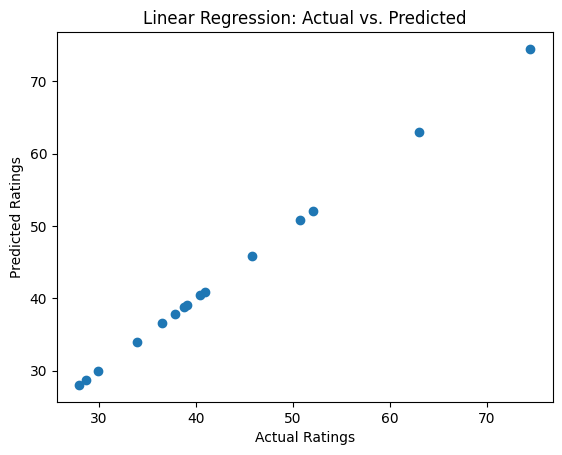

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


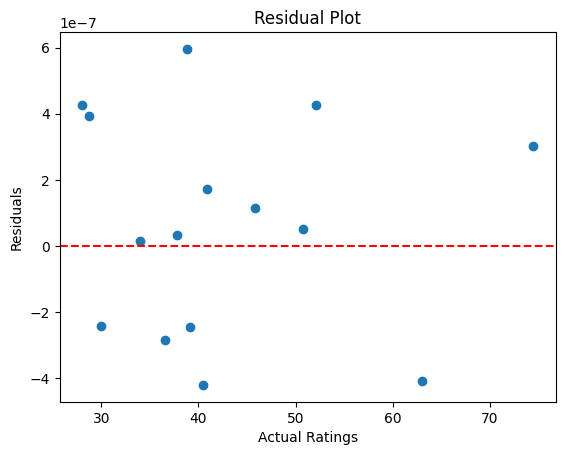

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Ratings')
plt.ylabel('Residuals')
plt.show()


# **Plot Observatons**:

The **first plot** shows that the model is performing well because the points fall on or close to a diagonal line.

The **second plot** is a residual plot that shows the differences between the actual and predicted values. This plot checks for trends. The model is provided to be unbaised because the residuals are randomly scattered around the horizontal line.

In [ ]:
from sklearn.model_selection import cross_val_score

# Create a linear regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Display cross-validation scores
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))


Cross-Validation R-squared Scores: [1. 1. 1. 1. 1.]
Mean R-squared: 0.9999999999999989


## Validation Observations:

Getting an R-squared of 1.0 on every fold indicates that the model is possibily fitting the data extremely well, indicating a sign of **overfitting**, especially since the dataset is not very large.

## Dropping Correlating Features

In [ ]:
df_Cereals = df_Cereals.drop(['fiber', 'potass'], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_training = df_Cereals.copy()

# Extract numeric columns
numeric_columns = df_training.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df_training[numeric_columns]

# Normalizing a DataFrame using pandas:
norm_df_pandas = (df_numeric - df_numeric.mean()) / df_numeric.std()

# Normalizing a DataFrame using scikit-learn StandardScaler:
scaler_standard = StandardScaler()
norm_df_scikit_standard = pd.DataFrame(scaler_standard.fit_transform(df_numeric),
                                       index=df_numeric.index, columns=df_numeric.columns)

# Rescaling a DataFrame using pandas:
rescaled_df_pandas = (df_numeric - df_numeric.min()) / (df_numeric.max() - df_numeric.min())

# Rescaling a DataFrame using scikit-learn MinMaxScaler:
scaler_minmax = MinMaxScaler()
rescaled_df_scikit_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_numeric),
                                         index=df_numeric.index, columns=df_numeric.columns)




####Training/Testing

In [ ]:
from sklearn.model_selection import train_test_split

# 'rating' is the target variable
X = df_numeric.drop('rating', axis=1)  # Features
y = df_numeric['rating']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (59, 10)
X_test shape: (15, 10)
y_train shape: (59,)
y_test shape: (15,)


## Rerunning the Linear Regression Models

Rerunning the model to see if it will preform better after we dropped some correlating features

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df_numeric.drop('rating', axis=1)  # Features
y = df_numeric['rating']  # Target variable

# Split the data into training and test sets
# it's an 80/20 split

# random_state parameter ensures reproducibility:
# meaning if you run the code multiple times, you'll get the same split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

model = LinearRegression() # Create a linear regression model
model.fit(X_train, y_train)# Train the model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 7.047737791741596
R-squared: 0.9546605607166941


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming y_test is the actual target values and y_pred is the predicted values
# y_test and y_pred are assumed to be NumPy arrays or pandas Series

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 2.654757576830999
Mean Absolute Error (MAE): 1.8769295180665917


In [ ]:
from sklearn.model_selection import cross_val_score

# Create a linear regression model
model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Display cross-validation scores
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))


Cross-Validation R-squared Scores: [0.82886324 0.95853969 0.22065541 0.82023781 0.94068815]
Mean R-squared: 0.7537968587084961


# **Observations**:

Upon removing some correlated features, the R-squared value decreased from 0.999 to 0.955, signifying that the model now explains approximately 95.5% of the variance in the target variable. Both RMSE and MAE values reinforce that the model's predictions maintain a reasonable proximity to the actual values.

The cross-validation R-squared scores offer additional insights into the model's generalization capability, revealing a mean R-squared of 0.7537968587084961 across various subsets of the data.

In summary, the updated model demonstrates satisfactory performance based on these metrics, and the validation results suggest that concerns about overfitting have been alleviated.